<a href="https://colab.research.google.com/github/ramahasiba/NLP/blob/langGraph/Build_a_Question_Answering_System_Over_SQL_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Build a Question Answering System Over SQL Data](https://python.langchain.com/docs/tutorials/sql_qa/)

In [ ]:
!apt-get update && apt-get install -y sqlite3 -q

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,628 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,750 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,254 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main a

In [ ]:
!curl -s https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sql | sqlite3 Chinook.db

In [ ]:
%%capture --no-stderr
%pip install --upgrade --quiet langchain-community langgraph

In [ ]:
!pip install dotenv -q
from dotenv import load_dotenv
try:
  load_dotenv('.env')
except ImportError:
  print('No .env file found')

In [ ]:
import getpass
import os

os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = os.environ.get("LANGSMITH_API_KEY")

In [ ]:
!pip install -qU "langchain[groq]"
os.environ["GROQ_API_KEY"]=os.environ.get("GROQ_API_KEY")

model_name = "llama3-70b-8192"

from langchain.chat_models import init_chat_model
llm=init_chat_model(model_name, model_provider="groq")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install -qU langchain-huggingface

from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
!pip install -qU langchain-chroma

from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 7.1 MB/s eta 

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


In [ ]:
from langchain_community.utilities import SQLDatabase

db = SQLDatabase.from_uri("sqlite:///Chinook.db")
print(db.dialect)
print(db.get_usable_table_names())
db.run("SELECT * FROM Artist LIMIT 10;")

sqlite
['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


"[(1, 'AC/DC'), (2, 'Accept'), (3, 'Aerosmith'), (4, 'Alanis Morissette'), (5, 'Alice In Chains'), (6, 'Antônio Carlos Jobim'), (7, 'Apocalyptica'), (8, 'Audioslave'), (9, 'BackBeat'), (10, 'Billy Cobham')]"

In [ ]:
from typing_extensions import TypedDict

class State(TypedDict):
  question: str
  query: str
  result: str
  answer: str

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

system_message = """
Given an input question, create a syntactically correct {dialect} query to
run to help find the answer. Unless the user specifies in his question a
specific number of examples they wish to obtain, always limit your query to
at most {top_k} results. You can order the results by a relevant column to
return the most interesting examples in the database.

Never query for all the columns from a specific table, only ask for a the
few relevant columns given the question.

Pay attention to use only the column names that you can see in the schema
description. Be careful to not query for columns that do not exist. Also,
pay attention to which column is in which table.

Only use the following tables:
{table_info}
"""

user_prompt = "Question: {input}"

query_prompt_template = ChatPromptTemplate(
    [("system", system_message), ("user", user_prompt)]
)

for message in query_prompt_template.messages:
  message.pretty_print()

================================ System Message ================================


Given an input question, create a syntactically correct {dialect} query to
run to help find the answer. Unless the user specifies in his question a
specific number of examples they wish to obtain, always limit your query to
at most {top_k} results. You can order the results by a relevant column to
return the most interesting examples in the database.

Never query for all the columns from a specific table, only ask for a the
few relevant columns given the question.

Pay attention to use only the column names that you can see in the schema
description. Be careful to not query for columns that do not exist. Also,
pay attention to which column is in which table.

Only use the following tables:
{table_info}

================================ Human Message =================================

Question: {input}


In [ ]:
from typing_extensions import Annotated, TypedDict
class QueryOutput(TypedDict):
  """Generated SQL query."""
  query: Annotated[str, ..., "Syntactically valid SQL query."]

def write_query(state: State):
  """Generate SQL query to fetch information."""
  prompt = query_prompt_template.invoke(
      {
          "dialect": db.dialect,
          "top_k": 10,
          "table_info": db.get_table_info(),
          "input": state["question"],
      }
  )
  structured_llm = llm.with_structured_output(QueryOutput)
  result = structured_llm.invoke(prompt)
  return {"query": result["query"]}

In [ ]:
write_query({"question": "How many Employees are there?"})

{'query': 'SELECT COUNT(*) FROM Employee LIMIT 10'}

In [ ]:
from langchain_community.tools.sql_database.tool import QuerySQLDatabaseTool

def execute_query(state: State):
  """Execute SQL query."""
  execute_query_tool = QuerySQLDatabaseTool(db=db)
  return {"result": execute_query_tool.invoke(state["query"])}

In [ ]:
execute_query({"query": "SELECT COUNT(EmployeeId) AS EmployeeCount FROM Employee;"})

{'result': '[(8,)]'}

In [ ]:
def generate_answer(state: State):
  """Answer question using retrieved information as context."""
  prompt = (
      "Given the following user question, corresponding SQL query,"
      "and SQL result, answer the user question. \n\n"
      f"Question: {state['question']}\n"
      f"SQL Query: {state['query']}\n"
      f"SQL Result: {state['result']}\n"
  )
  response = llm.invoke(prompt)
  return {"answer": response.content}

In [ ]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence(
    [write_query, execute_query, generate_answer]
)
graph_builder.add_edge(START, "write_query")
graph = graph_builder.compile()

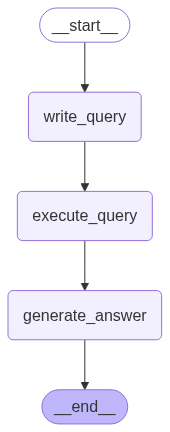

In [ ]:
graph

In [ ]:
for step in graph.stream(
    {"question": "How many employees are there?"}, stream_mode="updates"
):
  print(step)

{'write_query': {'query': 'SELECT COUNT(*) FROM Employee LIMIT 10'}}
{'execute_query': {'result': '[(8,)]'}}
{'generate_answer': {'answer': 'The answer to the user question is: There are 8 employees.\n\nNote: The LIMIT 10 clause in the SQL query is not relevant to the answer, as it only limits the number of rows returned, but the COUNT(*) function returns a single row with the count of all employees, which is 8.'}}


In [ ]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory, interrupt_before=["execute_query"])

config = {"configurable": {"thread_id": "1"}}

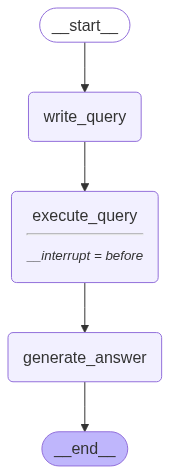

In [ ]:
graph

In [ ]:
for step in graph.stream(
  {"question": "How amny employees are there?"},
  config,
  stream_mode="updates"
):
  print(step)

try:
  user_approval = input("Do you want to go to execute query? (yes/no):")
except Exception:
  user_approval = "no"

if user_approval.lower() == "yes":
  # If approved, continue the graph ExecutionContext
  for step in graph.stream(None, config, stream_mode="updates"):
    print(step)
else:
  print("Operation cancelled by user.")

{'write_query': {'query': 'SELECT COUNT(*) AS count FROM Employee'}}
{'__interrupt__': ()}
Do you want to go to execute query? (yes/no):yes
{'execute_query': {'result': '[(8,)]'}}
{'generate_answer': {'answer': 'There are 8 employees.'}}


In [ ]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

toolkit = SQLDatabaseToolkit(db=db, llm=llm)

tools = toolkit.get_tools()

tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7be8771b5010>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7be8771b5010>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7be8771b5010>),
 QuerySQLCheckerTool(description='Use this tool to double check

In [ ]:
system_message = """
You are an agent designed to interact with a SQL database.
Given an input question, create a syntactically correct {dialect} query to run,
then look at the results of the query and return the answer. Unless the user
specifies a specific number of examples they wish to obtain, always limit your
query to at most {top_k} results.

You can order the results by a relevant column to return the most interesting
examples in the database. Never query for all the columns from a specific table,
only ask for the relevant columns given the question.

You MUST double check your query before executing it. If you get an error while
executing a query, rewrite the query and try again.

DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the
database.

To start you should ALWAYS look at the tables in the database to see what you
can query. Do NOT skip this step.

Then you should query the schema of the most relevant tables.
""".format(
    dialect="SQLite",
    top_k=5,
)

In [ ]:
from langchain_core.messages import HumanMessage
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(llm, tools, prompt=system_message)

In [ ]:
question = "Which country's customers spent the most?"

for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
  step["messages"][-1].pretty_print()

================================ Human Message =================================

Which country's customers spent the most?
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (f228skede)
 Call ID: f228skede
  Args:
    tool_input:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (9jzc0v9g2)
 Call ID: 9jzc0v9g2
  Args:
    table_names: Customer, Invoice
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE "Customer" (
	"CustomerId" INTEGER NOT NULL, 
	"FirstName" NVARCHAR(40) NOT NULL, 
	"LastName" NVARCHAR(20) NOT NULL, 
	"Company" NVARCHAR(80), 
	"Address" NVARCHAR(70), 
	"City" NVARCHAR(40), 

In [ ]:
for step in agent_executor.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
  print(f"{step}\n\n----------------\n")

{'messages': [HumanMessage(content="Which country's customers spent the most?", additional_kwargs={}, response_metadata={}, id='fd8a550f-c45f-432c-9ba1-44588fc4f900')]}

----------------

{'messages': [HumanMessage(content="Which country's customers spent the most?", additional_kwargs={}, response_metadata={}, id='fd8a550f-c45f-432c-9ba1-44588fc4f900'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ac65zmk7q', 'function': {'arguments': '{"tool_input":""}', 'name': 'sql_db_list_tables'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 67, 'prompt_tokens': 1583, 'total_tokens': 1650, 'completion_time': 0.191428571, 'prompt_time': 0.059394208, 'queue_time': 0.058181139, 'total_time': 0.250822779}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0a81943d-e7f2-4381-a28d-d603f4e08df2-0', tool_calls=[{'name': 'sql_db_list_tables', 'args': {'tool_input': ''}, 'id'

In [ ]:
import ast
import re

def query_as_list(db, query):
  res = db.run(query)
  res = [el for sub in ast.literal_eval(res) for el in sub if el]
  res = [re.sub(r"\b\d+\b", "", string).strip() for string in res]
  return list(set(res))

artists = query_as_list(db, "SELECT Name FROM Artist")
albums = query_as_list(db, "SELECT Title FROM Album")
albums[:5]

['Out Of Time',
 'Sex Machine',
 "Great Recordings of the Century: Paganini's  Caprices",
 'Use Your Illusion I',
 'UB40 The Best Of - Volume Two [UK]']

In [ ]:
!pip install -qU langchain-chroma

In [ ]:
from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name="SQL_Agent",
    embedding_function=embeddings,
    persist_directory="./db",  # Where to save data locally, remove if not necessary
)

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


In [ ]:
from langchain.agents.agent_toolkits import create_retriever_tool

_ = vector_store.add_texts(artists + albums)
retriever = vector_store.as_retriever(search_kwargs={"k": 5})
description = (
    "Use to look up values to filter on. Input is an approximate spelling "
    "of the proper noun, output is valid proper nouns. Use the noun most "
    "similar to the search."
)

retriever_tool = create_retriever_tool(
    retriever,
    name="search_proper_nouns",
    description=description,
)

In [ ]:
print(retriever_tool.invoke("Alice Chains"))

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given


Alice In Chains

Iron Maiden

Iron Maiden

Black Sabbath

Black Sabbath


In [ ]:
# Add to system message
suffix = (
    "If you need to filter on a proper noun like a Name, you must ALWAYS first look up "
    "the filter value using the 'search_proper_nouns' tool! Do not try to "
    "guess at the proper name - use this function to find similar ones."
)

system = f"{system_message}\n\n{suffix}"

tools.append(retriever_tool)

agent = create_react_agent(llm, tools, prompt=system)

In [ ]:
question = "How many albums does Aisha Duo in chain have?"

for step in agent.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

How many albums does Aisha Duo in chain have?
================================== Ai Message ==================================
Tool Calls:
  search_proper_nouns (b7hdq4kcs)
 Call ID: b7hdq4kcs
  Args:
    query: Aisha Duo in chain
================================= Tool Message =================================
Name: search_proper_nouns

Aisha Duo

Duos II

A-Sides

The Singles

International Superhits
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (3fz06112c)
 Call ID: 3fz06112c
  Args:
    tool_input:
================================= Tool Message =================================
Name: sql_db_list_tables

Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, Track
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (e17fy39t0)
 Call ID:

In [ ]:
print(retriever_tool.invoke("Alis"))

Aisha Duo

Xis

Matisyahu

Warner  Anos

Titãs


In [ ]:
# Get the list of all tables
tables = db.get_usable_table_names()

# Loop through each table and display a few rows
for table_name in tables:
    print(f"\n--- Sample rows from table: {table_name} ---")
    try:
        # Limit to 5 rows for brevity
        query = f"SELECT * FROM {table_name} LIMIT 5;"
        rows = db.run(query)
        print(rows)
    except Exception as e:
        print(f"Could not retrieve data from {table_name}: {e}")


--- Sample rows from table: Album ---
[(1, 'For Those About To Rock We Salute You', 1), (2, 'Balls to the Wall', 2), (3, 'Restless and Wild', 2), (4, 'Let There Be Rock', 1), (5, 'Big Ones', 3)]

--- Sample rows from table: Artist ---
[(1, 'AC/DC'), (2, 'Accept'), (3, 'Aerosmith'), (4, 'Alanis Morissette'), (5, 'Alice In Chains')]

--- Sample rows from table: Customer ---
[(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3), (2, 'Leonie', 'Köhler', None, 'Theodor-Heuss-Straße 34', 'Stuttgart', None, 'Germany', '70174', '+49 0711 2842222', None, 'leonekohler@surfeu.de', 5), (3, 'François', 'Tremblay', None, '1498 rue Bélanger', 'Montréal', 'QC', 'Canada', 'H2G 1A7', '+1 (514) 721-4711', None, 'ftremblay@gmail.com', 3), (4, 'Bjørn', 'Hansen', None, 'Ullevålsveien 14', 'Oslo', None, 'Norway', '0171', '+47 22

In [ ]:
print(db.run("SELECT * FROM Artist;"))

[(1, 'AC/DC'), (2, 'Accept'), (3, 'Aerosmith'), (4, 'Alanis Morissette'), (5, 'Alice In Chains'), (6, 'Antônio Carlos Jobim'), (7, 'Apocalyptica'), (8, 'Audioslave'), (9, 'BackBeat'), (10, 'Billy Cobham'), (11, 'Black Label Society'), (12, 'Black Sabbath'), (13, 'Body Count'), (14, 'Bruce Dickinson'), (15, 'Buddy Guy'), (16, 'Caetano Veloso'), (17, 'Chico Buarque'), (18, 'Chico Science & Nação Zumbi'), (19, 'Cidade Negra'), (20, 'Cláudio Zoli'), (21, 'Various Artists'), (22, 'Led Zeppelin'), (23, 'Frank Zappa & Captain Beefheart'), (24, 'Marcos Valle'), (25, 'Milton Nascimento & Bebeto'), (26, 'Azymuth'), (27, 'Gilberto Gil'), (28, 'João Gilberto'), (29, 'Bebel Gilberto'), (30, 'Jorge Vercilo'), (31, 'Baby Consuelo'), (32, 'Ney Matogrosso'), (33, 'Luiz Melodia'), (34, 'Nando Reis'), (35, 'Pedro Luís & A Parede'), (36, 'O Rappa'), (37, 'Ed Motta'), (38, 'Banda Black Rio'), (39, 'Fernanda Porto'), (40, 'Os Cariocas'), (41, 'Elis Regina'), (42, 'Milton Nascimento'), (43, 'A Cor Do Som'), 

In [ ]:
question = "How many artists are there?"
artists_number_response = agent.invoke(
    {"messages": [{"role": "user", "content": question}]}
    )

In [ ]:
artists_number_response["messages"][-1]

AIMessage(content='There are 275 artists.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 2067, 'total_tokens': 2074, 'completion_time': 0.111861131, 'prompt_time': 0.076997992, 'queue_time': 0.20846434399999997, 'total_time': 0.188859123}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--627cbc42-da93-40c7-8ce3-3542c903d80e-0', usage_metadata={'input_tokens': 2067, 'output_tokens': 7, 'total_tokens': 2074})

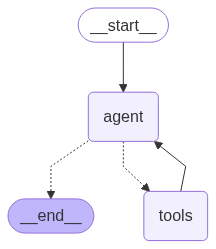

In [59]:
agent